In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 15s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:

y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

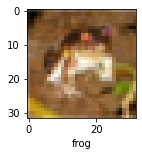

In [10]:
plot_sample(X_train, y_train, 0)

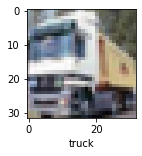

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
     ##
     layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

     ##
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 41s 7ms/step - loss: 1.7579 - accuracy: 0.3515
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1579 - accuracy: 0.5911
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9743 - accuracy: 0.6599
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8603 - accuracy: 0.7009
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7848 - accuracy: 0.7275
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7059 - accuracy: 0.7538
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6475 - accuracy: 0.7740
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6010 - accuracy: 0.7895
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5595 - accuracy: 0.8040
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9267 - accuracy: 0.7042


[0.9267374277114868, 0.704200029373169]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.05686970e-02, 1.40225161e-02, 1.77611679e-01, 4.33710754e-01,
        8.64699185e-02, 2.15911373e-01, 2.61360202e-02, 6.15133531e-03,
        1.11345006e-02, 1.82832126e-02],
       [2.96970626e-04, 3.68933543e-04, 7.39297946e-07, 4.64273086e-07,
        5.71015050e-07, 1.54720947e-08, 8.61562466e-09, 3.10582237e-07,
        9.99167204e-01, 1.64860525e-04],
       [1.70592055e-01, 2.41094723e-01, 4.48796479e-03, 2.46020919e-03,
        1.66303606e-03, 5.69046359e-04, 1.71814638e-04, 1.08806398e-02,
        1.67841956e-01, 4.00238603e-01],
       [8.96388054e-01, 9.02432017e-04, 8.59258920e-02, 8.62387882e-04,
        1.14472834e-02, 5.12010729e-06, 1.35713344e-04, 1.20600025e-05,
        3.97491781e-03, 3.46236047e-04],
       [4.70899868e-05, 1.00888269e-06, 3.78747508e-02, 5.91121754e-03,
        1.04937524e-01, 8.33023572e-04, 8.50290000e-01, 3.51502877e-06,
        9.43808845e-05, 7.49356605e-06]], dtype=float32)

In [19]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

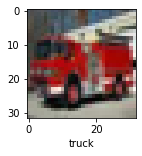

In [21]:
plot_sample(X_test, y_test,23)

In [22]:
classes[y_classes[23]]

'truck'

In [24]:
cnn.save('cnn_cifar10.h5')